# PCA & SVD

이번 시간에는 PCA와 SVD에 대해 실습해봅시다.

## Dimensionality Reduction

우리는 기껏 해야 3차원의 데이터만을 그래프 등으로 시각화하여 확인할 수 있습니다. 하지만 우리가 가진 많은 데이터들은 그보다 훨씬 큰 차원을 가지고 있지요. 이런 경우, <b>dimensionality reduction</b>이 하나의 해법이 될 수 있습니다. 데이터가 가진 특징을 최대한 유지하면서, 데이터의 차원을 줄이는 방법이지요. 

시각화 이외에도, dimensionality reduction이 사용되는 이유에는 여러가지가 있습니다.

1. 큰 데이터셋을 보다 다루기 쉽게 만든다.
2. 계산량을 줄인다.
3. 데이터의 noise를 줄인다.
4. 결과를 보다 해석하기 쉽게 만든다.

Labeled, unlabeled 데이터셋에 대한 dimensionality reduction 방법이 각각 존재합니다. 여기서는 unlabeled 데이터셋에 대한 방법인 Principle Component Analysis(PCA)에 대해서 실습을 해봅시다.

우리가 가진 초기의 데이터셋은 각각의 feature가 하나의 coordinate을 나타낸다고 말할 수 있을 것입니다. 즉 하나의 데이터는 각각의 축 상의 하나의 값을 가지는 N차원의 점이 되는 것이죠. 

PCA는 데이터를 나타내는 새로운 축을 찾습니다. 이 축을 principle component라고 합니다. 첫 번째 principle component는 데이터의 분산이 가장 커지는 축이고, 두 번째 principle component는 첫 번째 principle component와 수직이면서, 데이터의 분산이 가장 커지는 축입니다. 이렇게 데이터를 표현하는 새로운 축들을 찾아 가는 것입니다.

우리가 기대하는 것은 처음 몇 개의 principle component가 매우 큰 분산을 갖도록 하여 이 몇 개만을 가지고 데이터를 잘 나타낼 수 있게 되는 겁니다.

<img src="./img/8_1.jpg"></img>

위의 그림에서 첫 번째 principle component는 축 B, 두 번째 principle component는 축 C가 되겠죠.

<img src="./img/8_2.jpg"></img>

위의 그림은 세 개의 class를 갖는 데이터셋입니다. 위의 그림을 봅시다. 이를 분류하는 분류기를 만들고 싶습니다. 가장 먼저 떠오르는 것은 decision tree 입니다. 예를 들어, X < 4이면 class 0 ... 이런 식으로 말이죠. 좀더 좋은 margin을 얻기 위해서 (Multi-class) SVM을 쓸 수도 있을 것 같습니다. 하지만 이 경우 hyperplane을 해석하기가 좀더 어려워지죠.

PCA를 사용하면 이 문제점을 모두 해결할 수 있습니다. Decision tree와 같이 간단하면서도, SVM과 같이 좋은 margin을 갖는 분류기를 만들 수 있습니다!

가장 큰 분산을 갖는 축은 어떻게 구할 수 있을까요? Eigenvalue Analysis를 이용하면 됩니다. 데이터의 covariance matrix의 eigenvalue를 감소하는 순서대로 정렬하고, 그에 상응하는 top N eigenvector를 구하면 바로 그것이 top N principle component가 되는 것입니다.

기존의 데이터에 이렇게 구성된 top N eigenvector들을 곱하면 principle component들이 이루는 새로운 공간으로 transform됩니다.

이제 직접 코딩을 해봅시다. 편리하게도 numpy에서는 행렬의 eigenvalue/vector를 구하는 method인 <b>numpy.linalg.eig()</b>를 제공합니다.

또한 numpy.cov() method로 covariance matrix를 구할 수 있지요.

Pseudocode는 다음과 같습니다.

### Pseudocode

각 feature들의 평균을 빼서 normalize한다.

Covariance matrix를 구하고, eigenvalue와 eigenvector를 구한다.

Eigenvalue를 작아지는 순서대로 정렬한다.

Top N eigenvector를 취한다.

Data를 Top N eigenvector들이 이루는 새로운 공간으로 transform 시킨다.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def loadDataSet(fileName, delim="\t"):
    fr = open(fileName)
    stringArr = [line.strip().split(delim) for line in fr.readlines()]
    datArr = [list(map(float, line)) for line in stringArr]
    return np.mat(datArr)

def pca(dataMat, topNfeat=9999999):
    meanVals = np.mean(dataMat, axis=0)
    meanRemoved = dataMat - meanVals
    covMat = np.cov(meanRemoved, rowvar=0)
    eigVals, eigVects = np.linalg.eig(np.mat(covMat))
    eigValIndex = np.argsort(eigVals)[:-(topNfeat+1):-1]
    topNEigVects = eigVects[:, eigValIndex]
    lowDimensionDataMat = meanRemoved * topNEigVects
    reconstructedDataMat = (lowDimensionDataMat * topNEigVects.T) + meanVals
    return lowDimensionDataMat, reconstructedDataMat, eigVals


In [2]:
# load test dataset with 2 dimensions
myDataMat = loadDataSet("./datasets/pca-testSet.txt")
# perform pca
lowDimensionDataMat, reconstructedDataMat, eigVals = pca(myDataMat, 1)

print(lowDimensionDataMat[:5])

[[ 2.85304352]
 [-1.78137485]
 [-0.07249384]
 [-0.13154076]
 [-0.60195767]]


2차원의 데이터셋이 1차원으로 축소되었습니다.

reconstructedDataMat이 어떻게 생겼는지 확인해봅시다.

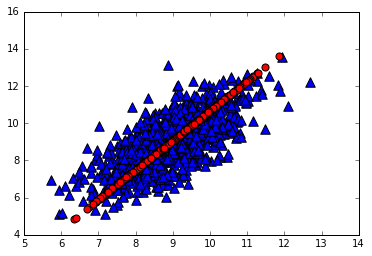

In [3]:
plt.scatter(myDataMat[:, 0], myDataMat[:, 1], marker="^", s=90)
plt.scatter(reconstructedDataMat[:, 0], reconstructedDataMat[:, 1], marker="o", s=50, c="red")
plt.show()

정말로 Principle component를 따라 나란하게 분포하고 있군요!

이제 간단한 데이터셋에 대해서 PCA가 잘 작동함을 확인했습니다. 조금 복잡한 데이터셋에 PCA를 적용시켜봅시다.

## 예제: Iris Dataset

<a href="./datasets/iris.txt">Iris dataset</a>에 PCA를 적용시켜 봅시다.

이 데이터셋은 feature가 총 4개(꽃받침 길이/폭, 꽃잎 길이/폭)여서, 단순히 시각화할 수 없습니다. 차원을 줄여야만 하죠.

코딩을 해봅시다.

먼저 데이터셋을 불러옵시다.

In [4]:
def loadIris():
    data = []
    label = []
    with open("./datasets/iris.txt") as inFile:
        for line in inFile.readlines():
            tokens = line.strip().split(",")  # the file is comma-separated
            data.append([float(t) for t in tokens[:4]])  # take 4 features
            label.append(tokens[-1])  # take label
    return np.array(data), np.array(label)

irisData, irisLabel = loadIris()

print(irisData[:3])
print(irisLabel[:3])

[[ 5.1  3.5  1.4  0.2]
 [ 4.9  3.   1.4  0.2]
 [ 4.7  3.2  1.3  0.2]]
['Iris-setosa' 'Iris-setosa' 'Iris-setosa']


PCA를 돌려봅시다.

In [5]:
irisLowDimensionData, irisReconstructedData, eigVals = pca(irisData, 2)

print(irisData.shape)
print(irisLowDimensionData.shape)

(150, 4)
(150, 2)


4차원의 데이터가 2차원으로 줄어들었습니다.

Eigenvalue들의 값을 비교하면, top N principle component가 데이터를 얼마나 잘 설명하는지 감을 잡을 수 있습니다.

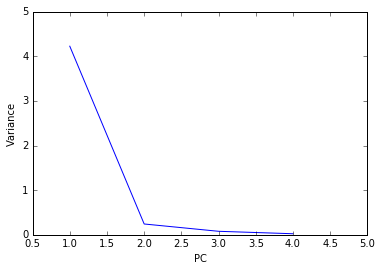

In [6]:
plt.plot(list(range(1, 5)), list(sorted(eigVals, reverse=True)))
plt.axis((0.5, 5, 0, 5))
plt.xlabel("PC")
plt.ylabel("Variance")
plt.show()

처음 2개의 principle component가 대부분의 variance를 차지하고 있군요. 2차원 그래프를 그려도 잘 그려질 것 같습니다.

차원이 줄어든 데이터셋을 그려봅시다.

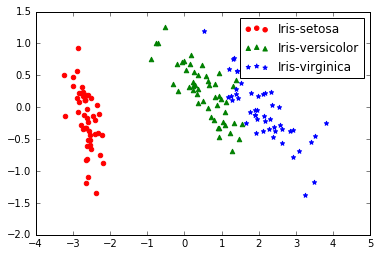

In [7]:
labels = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']

for color, marker, label in zip("rgb", "o^*", labels):
    plt.scatter(irisLowDimensionData[irisLabel == label, 0], irisLowDimensionData[irisLabel == label, 1], marker=marker, color=color, label=label)

plt.legend()
plt.show()

세 종이 꽤나 잘 분리되어 나타나는군요!

## Singular Value Decomposition (SVD)

음식점에는 한식집, 중식집, 일식집, 스테이크집 등 여러가지 종류가 있습니다. 어떤 요소가 음식점을 한식점으로, 혹은 중식점으로 만드는 것일까요?

너무나 당연한 이야기처럼 보이겠지만, 여기서는 이러한 요소를 사람의 힘으로 직접 찾기보다 <b>데이터 자체를 학습시켜서</b> 장르를 구분짓는 요소를 학습하게 할 것입니다.

데이터로는 각각의 사람이 음식점에 매긴 평점을 이용할 것입니다.

이렇게 데이터로부터 숨겨진 요소(latent factor)를 추출해내는 작업은 생물정보학부터 경제학까지 여러가지 분야에 걸쳐 사용되고 있는 중요한 방법입니다.

지금부터 singular value decomposition이 무엇인지, 그리고 어떻게 이 방법이 데이터의 차원을 축소하는데 사용될 수 있는지 알아볼 것입니다.

<b>Recommendation system</b>에 SVD가 어떻게 이용될 수 있는지 실습해보도록 합시다.

### Recommendation system

간단한 추천 시스템은 '당신과 비슷한 사람들이 선호한 것'을 추천하는 방식을 취합니다. 하지만 보다 발전된 추천 시스템은 당신과 비슷한 사람들이 <b>왜 그것을 선호하는지</b> 숨겨진 요소를 추출하여 그와 비슷한 것을 추천하게 됩니다. 아래의 행렬을 봅시다.

<img src="./img/8_3.jpg"></img>

이것은 7명의 사람들(행)이 5개의 음식점(열)에 대해 평점(0~5)을 매긴 행렬입니다. 방법은 추후에 설명하겠지만, 이 행렬에 대해서 SVD를 수행하면 2개의 singular value가 추출됩니다. 즉, 데이터를 2차원의 숨겨진 요소들로 표현할 수 있다는 것이죠. 각각의 차원은 '일식', '바베큐' 정도를 나타내는 차원이 되겠네요!

numpy.linalg.svd() 메소드를 이용하면 간단하게 SVD를 수행할 수 있습니다. 참 쉽죠?

In [8]:
def loadExampleData1():
    return [[0, 0, 0, 2, 2],
               [0, 0, 0, 3, 3], 
               [0, 0, 0, 1, 1], 
               [1, 1, 1, 0, 0],
               [2, 2, 2, 0, 0],
               [5, 5, 5, 0, 0],
               [1, 1, 1, 0, 0]]

# run svd
U, sigma, Vt = np.linalg.svd(loadExampleData1())
# print singular values
print(sigma)


[  9.64365076e+00   5.29150262e+00   6.51609210e-16   2.14818942e-16
   5.18511491e-17]


역시 2개의 singular value만이 0이 아닌 값을 가지는 것을 확인할 수 있습니다.

In [9]:
def loadExampleData2():
        return [[1, 1, 0, 2, 2],
               [0, 0, 0, 3, 3], 
               [0, 0, 0, 1, 1], 
               [1, 1, 1, 0, 0],
               [2, 2, 2, 0, 0],
               [5, 5, 5, 0, 0],
               [1, 1, 1, 0, 0]]
    
# run svd
U, sigma, Vt = np.linalg.svd(loadExampleData2())
# print singular values
print(sigma)

[  9.72140007e+00   5.29397912e+00   6.84226362e-01   8.40909475e-16
   5.38396347e-17]


이번엔 총 3개의 singular value만 취하면 되겠군요. 한번 3개의 singular value만으로 데이터셋을 reconstruction할 수 있는지 확인해봅시다.

In [10]:
reconstructed = U[:, :3] * np.mat(np.diag(sigma[:3])) * Vt[:3, :]
for i in range(7):
    for j in range(5):
        print("%.2f " % reconstructed[i, j], end="")
    print()

1.00 1.00 0.00 2.00 2.00 
0.00 0.00 -0.00 3.00 3.00 
0.00 0.00 -0.00 1.00 1.00 
1.00 1.00 1.00 0.00 0.00 
2.00 2.00 2.00 -0.00 -0.00 
5.00 5.00 5.00 0.00 0.00 
1.00 1.00 1.00 -0.00 -0.00 


놀랍군요! 원래 데이터셋을 정확하게 복원해냈습니다.

보통 singular value들의 제곱합의 90%가 넘는 singular value들을 취하면 원래의 데이터셋을 꽤 잘 복원시킨다고 합니다.


### Collaborative filtering

Recommendation을 위한 수많은 방법이 있지만, 여기서는 collaborative filtering에 대해 다루어 봅시다.

아까 다루었던 matrix가 있다고 생각합시다. 이때, 이때 각 행은 사람을 나타내며 각 열은 영화를 나타낸다고 합시다.

그러면 행 벡터와 열 벡터를 이용하여 사람 간, 혹은 영화 간의 similarity를 측정할 수 있습니다.

특정 사람 A가 보지 않은 영화가 주어집니다. 이 영화와 A가 본 영화간의 유사도가 높다면, A가 새로 주어진 영화를 보고싶어 할 것이라고 생각할 수 있습니다.

이렇게 User 혹은 Item간의 similarity를 측정하여 추천하는 방법을 collaborative filtering이라고 합니다.

그렇다면 두 벡터간의 similarity를 어떻게 측정할 수 있을까요?

3가지 방법이 있습니다.

1. Euclidian distance를 이용하는 방법<br/>

    $ \frac{1}{1 + \text{Euclidian distance}} $
    
2. Cosine distance를 이용하는 방법<br/>

    $ cos\theta = \frac{A \cdot B}{||A||||B||} $
    
3. Pearson correlation을 이용하는 방법<br/>

각각의 similarity measure들을 함수로 작성합시다.

In [11]:
def eucSim(x, y):
    return 1 / (1 + np.linalg.norm(x - y))

def pearsSim(x, y):
    if len(x) < 3:
        return 1.0
    return 0.5 + 0.5 * np.corrcoef(x, y, rowvar=0)[0][1]

def cosSim(x, y):
    num = float(x.T * y)
    denom = np.linalg.norm(x) * np.linalg.norm(y)
    return 0.5 + 0.5 * (num / denom)


In [12]:
myMat = np.mat(loadExampleData2())
print(myMat)

print()
print(eucSim(myMat[:, 0], myMat[:, 4]))
print(eucSim(myMat[:, 0], myMat[:, 0]))

print()
print(cosSim(myMat[:, 0], myMat[:, 4]))
print(cosSim(myMat[:, 0], myMat[:, 0]))

print()
print(pearsSim(myMat[:, 0], myMat[:, 4]))
print(pearsSim(myMat[:, 0], myMat[:, 0]))

[[1 1 0 2 2]
 [0 0 0 3 3]
 [0 0 0 1 1]
 [1 1 1 0 0]
 [2 2 2 0 0]
 [5 5 5 0 0]
 [1 1 1 0 0]]

0.1336766024
1.0

0.547245559126
1.0

0.237686194076
1.0


### 예제: 음식점 추천기

먼저 가장 기본적인 추천기를 만들어 봅시다. 그 후에 SVD를 적용시켜서 보다 발전된 추천기를 만들 것입니다.

기본적인 추천기는 다음과 같이 작동합니다.

1. User가 평점을 매기지 않은 item을 찾는다. (user-item matrix에서 0들을 찾는다.)

2. 평점을 아직 매기지 않은 item에 대해서, 해당 user가 줄 것으로 예상되는 평점을 계산한다. (similarity를 가중치로 이용하여 평균을 낸다.)

3. 평점이 작아지는 순서대로 정렬하여, top N item들을 출력한다.

먼저 예상되는 평점을 계산하는 basicEst() 함수를 작성합시다.

In [13]:
def basicEst(dataMat, user, simMeasure, item):
    n = dataMat.shape[1]
    simTotal = 0.0
    ratSimTotal = 0.0
    
    for j in range(n):
        userRating = dataMat[user, j]
        if userRating == 0:
            continue
        overLap = np.nonzero(np.logical_and(dataMat[:, item].A > 0, dataMat[:, j].A > 0))[0]
        if len(overLap) == 0:
            similarity = 0
        else:
            similarity = simMeasure(dataMat[overLap, item], dataMat[overLap, j])
        
        simTotal += similarity
        ratSimTotal += similarity * userRating
    if simTotal == 0:
        return 0
    else:
        return ratSimTotal / simTotal

이제 추천하는 함수 recommend()를 작성합시다.

In [14]:
def recommend(dataMat, user, N=3, simMeasure=cosSim, estMethod=basicEst):
    unratedItems = np.nonzero(dataMat[user, :].A == 0)[1]
    if len(unratedItems) == 0:
        print("You rated everything")
    itemScores = []
    for item in unratedItems:
        estimatedScore = estMethod(dataMat, user, simMeasure, item)
        itemScores.append((item, estimatedScore))
    
    return list(sorted(itemScores, key=lambda x: x[1], reverse=True))

테스트 해봅시다.

In [15]:
myMat = np.mat(loadExampleData2())

# modify my matrix
myMat[0, 1] = myMat[0, 0] = myMat[1, 0] = myMat[2, 0] = 4
myMat[3, 3] = 2

print(myMat)

print()
print(recommend(myMat, 2))

[[4 4 0 2 2]
 [4 0 0 3 3]
 [4 0 0 1 1]
 [1 1 1 2 0]
 [2 2 2 0 0]
 [5 5 5 0 0]
 [1 1 1 0 0]]

[(2, 2.5), (1, 2.0243290220056256)]


### Improving recommendations with SVD

기본적인 추천기를 만들었습니다. 이제 SVD를 적용시켜서 개선시켜봅시다.

이를 위해서 보다 현실적인 데이터셋이 필요합니다.

In [16]:
def loadExampleData3():
    return[[0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 5],
           [0, 0, 0, 3, 0, 4, 0, 0, 0, 0, 3],
           [0, 0, 0, 0, 4, 0, 0, 1, 0, 4, 0],
           [3, 3, 4, 0, 0, 0, 0, 2, 2, 0, 0],
           [5, 4, 5, 0, 0, 0, 0, 5, 5, 0, 0],
           [0, 0, 0, 0, 5, 0, 1, 0, 0, 5, 0],
           [4, 3, 4, 0, 0, 0, 0, 5, 5, 0, 1],
           [0, 0, 0, 4, 0, 4, 0, 0, 0, 0, 4],
           [0, 0, 0, 2, 0, 2, 5, 0, 0, 1, 2],
           [0, 0, 0, 0, 5, 0, 0, 0, 0, 4, 0],
           [1, 0, 0, 0, 0, 0, 0, 1, 2, 0, 0]]

이 데이터에 대해서 SVD를 적용시켜볼까요?

In [17]:
myMat = np.mat(loadExampleData3())

U, sigma, Vt = np.linalg.svd(myMat)

print(sigma)

[ 15.77075346  11.40670395  11.03044558   4.84639758   3.09292055
   2.58097379   1.00413543   0.72817072   0.43800353   0.22082113
   0.07367823]


Sigma를 몇개를 취해야 제곱합의 90%를 차지하게 할 수 있을까요?

In [18]:
sigmaSquared = sigma ** 2

squareSum = sum(sigmaSquared)

for i in range(sigma.shape[0]):
    if sum(sigmaSquared[:i]) > squareSum * 0.9:
        print("%d singular values will do" % i)
        break

3 singular values will do


이제 svd를 이용하여 rating을 estimate하는 함수 svdEst를 작성합시다.

In [19]:
def svdEst(dataMat, user, simMeasure, item):
    n = dataMat.shape[1]
    simTotal = 0.0
    ratSimTotal = 0.0
    
    # perform svd to reduce dimension to 3
    U, sigma, Vt = np.linalg.svd(dataMat)
    transformedItems = Vt.T[:, :3]
    
    for j in range(n):
        userRating = dataMat[user, j]
        if userRating == 0.0 or j == item:
            continue
        similarity = simMeasure(transformedItems[item, :].T, transformedItems[j, :].T)
        print("the %d and %d similarity is: %f" % (item, j, similarity))
        
        simTotal += similarity
        ratSimTotal += similarity * userRating
    # ENDFOR
    if simTotal == 0:
        return 0
    else:
        return ratSimTotal / simTotal
    

In [20]:
print(myMat)
recommend(myMat, 1, estMethod=svdEst, simMeasure=pearsSim)

[[0 0 0 0 0 4 0 0 0 0 5]
 [0 0 0 3 0 4 0 0 0 0 3]
 [0 0 0 0 4 0 0 1 0 4 0]
 [3 3 4 0 0 0 0 2 2 0 0]
 [5 4 5 0 0 0 0 5 5 0 0]
 [0 0 0 0 5 0 1 0 0 5 0]
 [4 3 4 0 0 0 0 5 5 0 1]
 [0 0 0 4 0 4 0 0 0 0 4]
 [0 0 0 2 0 2 5 0 0 1 2]
 [0 0 0 0 5 0 0 0 0 4 0]
 [1 0 0 0 0 0 0 1 2 0 0]]
the 0 and 3 similarity is: 0.019549
the 0 and 5 similarity is: 0.015746
the 0 and 10 similarity is: 0.018862
the 1 and 3 similarity is: 0.019363
the 1 and 5 similarity is: 0.015579
the 1 and 10 similarity is: 0.018680
the 2 and 3 similarity is: 0.019381
the 2 and 5 similarity is: 0.015595
the 2 and 10 similarity is: 0.018697
the 4 and 3 similarity is: 0.597651
the 4 and 5 similarity is: 0.583430
the 4 and 10 similarity is: 0.595198
the 6 and 3 similarity is: 0.887994
the 6 and 5 similarity is: 0.878712
the 6 and 10 similarity is: 0.886412
the 7 and 3 similarity is: 0.038693
the 7 and 5 similarity is: 0.033309
the 7 and 10 similarity is: 0.037735
the 8 and 3 similarity is: 0.019926
the 8 and 5 similarity is: 0.01608

[(6, 3.3311997297614169),
 (9, 3.3285908265560447),
 (4, 3.3284563489329733),
 (7, 3.3035360373432208),
 (8, 3.2911703882737422),
 (0, 3.2907496020044729),
 (2, 3.2905582522897352),
 (1, 3.2905375165766362)]

### 예제: SVD를 이용한 이미지 압축

재미있는 예제입니다. SVD를 이용하여 이미지를 압축할 수 있습니다. 우리가 다루어봤던 손글씨 숫자 예제는 32 * 32의 총 1024픽셀 이미지였습니다.

이미지가 이보다 적은 용량을 차지하게 하면서, 원래의 이미지를 복원해낼 수 있을까요?

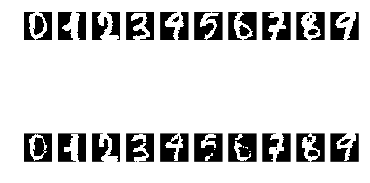

In [21]:
def getDigit(filePath):
    rows = []
    for line in open(filePath).readlines():
        row = []
        for i in range(32):
            row.append(int(line[i]))
        rows.append(row)
    digitMat = np.mat(rows)
    return digitMat

def thresholdMatrix(matrix, threshold=0.8):
    copyMat = matrix.copy()
    # threshold matrix
    copyMat[copyMat >= threshold] = 1
    copyMat[copyMat < threshold] = 0
    return copyMat

def show(matrix, fig=plt, threshold=0.8):
    thresholded = thresholdMatrix(matrix, threshold=threshold)
    fig.axis('off')
    fig.imshow(thresholded, interpolation='none', cmap='gray')

def imgCompress(dirPath, numSV=3, thresh=0.8):
    
    for i in range(10):
        origDigit = getDigit(dirPath + "%d_0.txt" % i)
        plt.subplot(2, 10, i+1)
        # show original digit
        show(origDigit)
        # perform svd
        U, sigma, Vt = np.linalg.svd(origDigit)
        reconstructedDigit = U[:, :numSV] * np.mat(np.diag(sigma[:numSV])) * Vt[:numSV, :]
        plt.subplot(2, 10, i+11)
        # show reconstructed digit
        show(reconstructedDigit)

imgCompress("./datasets/digits/trainingDigits/", numSV=4)

### 예제: Latent space에 손글씨 mapping하기

위의 예제에서 1024차원의 손글씨 숫자가 4개의 singular value만으로 꽤나 잘 표현됨을 확인해 보았습니다.

마지막으로 손글씨를 2차원으로 차원 축소한뒤, 이를 그려보는 것으로 실습을 마치겠습니다.

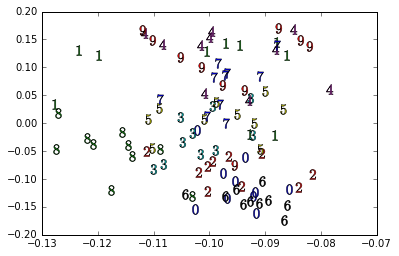

In [22]:
def getDigitVector(filePath):
    vec = []
    for line in open(filePath).readlines():
        for i in range(32):
            vec.append(int(line[i]))
    return np.array(vec)

def makeDigitMatrix(dirPath):
    digitMat = []
    for digit in range(10):
        for i in range(10):
            digitMat.append(getDigitVector(dirPath + "%d_%d.txt" % (digit, i)))
    return np.array(digitMat)

digitMat = makeDigitMatrix("./datasets/digits/trainingDigits/")
U, sigma, Vt = np.linalg.svd(digitMat)

latentFeatures = U[:, :2]
for i in range(10):
    start = i * 10
    end = (i+1) * 10
    plt.plot(latentFeatures[start:end, 0], latentFeatures[start:end, 1], marker="$"+str(i)+"$", markersize=10, linestyle='None')
    
plt.show()

0과 6, 혹은 4, 7, 9와 같이 비슷한 숫자들이 비슷한 위치에 나타나는 것을 확인할 수 있습니다.